## Twitter Report grade analysis
Having graded all the submissions for the Twitter Report assignment, I have a few questions.
1. How did the class do on this second assignment?
2. Are there any concerns about the class performance?
3. Is some action needed (like an assignment correction)?
4. How does the scores for this assignment compare to the scores on the "likes" Report?

For this analysis, the assignment scores were downloaded from Canvas. The student information was stripped from the data using Excel. In addition, the scores were randomized in Excel after downloading the data. This means that the normally-alphabetical data now has no association with student names or ID number.

### Analysis Plan
To analyze the data, the assignment scores will be loaded into the working environment and converted to a two-column DataFrame object. The univariate distribution will be assessed by plotting histograms. Outliers will be assessed and descriptive statistics (mean, median, standard deviation) will be calculated before and after any outliers are removed. In addition, a probability plot will show how well the grades match a normal distribution.

### Setting up the Environment
The following libraries will be used:
- scipy.stats
- pandas
- matplotlib.pyplot

In [1]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt

The grade data was exported as a CSV from Canvas. The pandas library provides the `read_csv()` function to load CSV data as a DataFrame.

In [2]:
filepath = r'C:\Users\dsilva2\EMAT22110_Office\likes_twitter_grades_anony.csv'
grades = pd.read_csv(filepath, header = 0)
print(len(grades))
grades.head()

17


,likes,twitter
0,109.5,118.5
1,150.0,144.0
2,150.0,132.0
3,140.0,120.5
4,127.5,97.0


### Univariate Distribution
The distribution of the grades is plotted using pyplot's `hist()` function.

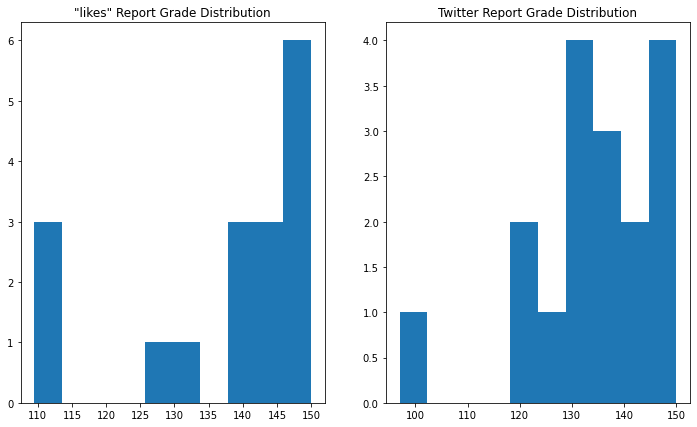

In [3]:
fig1, ax1 = plt.subplots(1, 2, figsize = (12, 7))
ax1[0].hist(grades['likes'])
ax1[0].set_title('"likes" Report Grade Distribution')
ax1[1].hist(grades['twitter'])
ax1[1].set_title('Twitter Report Grade Distribution')
plt.show()

The maximum points possible for both assignments was 150 points. These plots show reasonable data ranges and no obvious outliers.

### Descriptive Statistics
From scipy.stats, the `describe()` function provides the mean, standard deviation, minimum and maximum values, and measures of normality.<br> `describe()` returns a DescribeResult object, from which we can call the specific stats of interest.

#### Description of the full data
The number of observations is:

In [4]:
stats.describe(grades['twitter']).nobs

17

The mean is:

In [5]:
stats.describe(grades['twitter']).mean

134.55882352941177

The variance is:

In [6]:
stats.describe(grades['twitter']).variance

189.52757352941174

The minimum and maximum values are:

In [7]:
stats.describe(grades['twitter']).minmax

(97.0, 150.0)

The mode is:

In [8]:
stats.mode(grades['twitter']).mode[0]

150.0

The quantile ranges are:

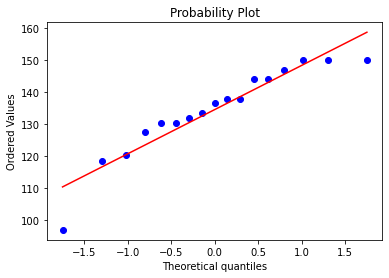

In [9]:
ax2 = plt.subplot()
res = stats.probplot(grades['twitter'], plot = plt)
plt.show()

### Comparisons between "likes" Report and Twitter Report
We are going to look at the distributions of the two scores to see whether the class, on average, did better or worse on this assignment compared to the first assignment.

Theoretically, this assignment requires the use of APIs, which is a more difficult task than was required in the first assignment. However, the class should have a higher level of skill after more weeks working with Python and data. I think the greater level of experience is going to result in higher scores on the Twitter assignment by 5%.

In [10]:
import numpy as np

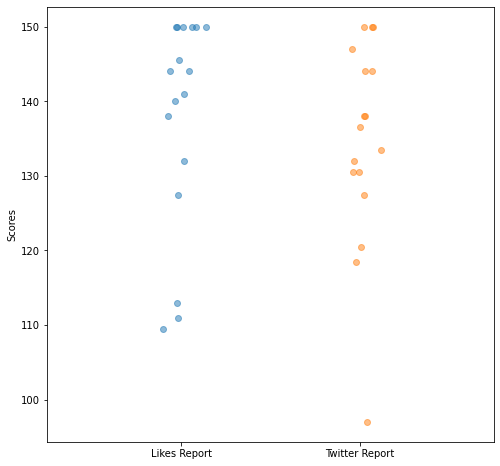

In [11]:
fig2, ax2 = plt.subplots(1, 1, figsize = (8, 8))

n_rows = len(grades.index)

l_offset = np.random.randn(n_rows) * .002
t_offset = np.random.randn(n_rows) * .002
l_x = [-.02] * n_rows
t_x = [.02] * n_rows
l_jitter = l_x + l_offset
t_jitter = t_x + t_offset

ax2.scatter(l_jitter, grades['likes'], alpha = .5)
ax2.scatter(t_jitter, grades['twitter'], alpha = .5)
ax2.set_xlim(-.05, .05)

ax2.set_xticks([-.02, .02])
ax2.set_xticklabels(['Likes Report', "Twitter Report"])
ax2.set_ylabel("Scores")
plt.show()

From this visual, it looks like there is little, if any difference between the scores between the two assignment. However, before relying on a t-test, we are going to check to see if the data for each assignment are distributed normally.

In [12]:
stats.shapiro(grades['likes'])

ShapiroResult(statistic=0.7940912842750549, pvalue=0.001685368362814188)

In [13]:
stats.shapiro(grades['twitter'])

ShapiroResult(statistic=0.8970282077789307, pvalue=0.06059015169739723)

Both of these results show strong evidence that the data are not distributed normally. Meaning a t-test may be inappropriate. Instead of a t-test, we are going to use what is called a "non-parametric" test. The Wilcoxon test converts the raw data to rank-order data and then compares the paired value ranks.

In [14]:
stats.wilcoxon(grades['likes'], grades['twitter'], mode = "approx")

WilcoxonResult(statistic=43.0, pvalue=0.3333003029059074)

### Conclusions
The visualization of the data and the Wilcox test both support the conclusion that there is no significant difference in scores between the two assignments. This goes against my hypothesis, but I am encouraged that at leas the class didn't do worse. Given that the average grade was 134 points out of 150, which is an 89%, I think this shows that the class, on the whole, is doing well on these assignments.<br> As I generally aim for a B average, this assignment may be too easy. A slightly more difficult assignment may better show which students are really excelling in the material.

__A final note__: I changed the Twitter Report significantly from last semester from feedback I received from students. The assignment last semester also included elements of natural language processing, which proved difficult for many students. Although I cannot directly compare the scores between semesters as the assignments are so different, this adjustment suggests I met my goal of making it easier for students to succeed on this assignment. 